# CS412 - Machine Learning - 2023
## Homework 1
100 pts

## Software: 

You may find the necessary function references here: 

http://scikit-learn.org/stable/supervised_learning.html

When you search for KNeighborsClassifier for instance, you should find the relevant function and explained parameters, easily.

## Submission: 
Fill this notebook. Write the report section at the end, removing the part in italics. 

You should prepare a separate pdf document as your homework (name HW1-CS412-yourname.pdf) which consists of the report (Part 8) of the notebook for easy viewing -and- include a link to your notebook from within the pdf report (make sure to include the link obtained from the **Share** button on top right).

##1) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you click the Connect button from upper right.


In [ ]:
import random
import numpy as np

random.seed(412)
np.random.seed(412)

## 2) Load training dataset

*  Read MNIST dataset from Keras library.



In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##3) Reshape the MNIST data

  In order to use images as input data for the sklearn k-NN classifier, the 2D image arrays need to be reshaped into a 1D arrays (in other words, a feature vector).

In [ ]:
print('Before reshaping: ', X_train.shape, X_test.shape)
# print(X_train)

Before reshaping:  (60000, 28, 28) (10000, 28, 28)


In [ ]:
N_train, height, width = X_train.shape

X_train = np.reshape(X_train, (N_train, height*width)) # from array of shape N_train x 28 x 28 ---> N_train x 784 (Note: 28*28 = 784)
X_test = np.reshape(X_test, (len(X_test), height*width)) # from array of shape N_test x 28 x 28 ---> N_test x 784 


In [ ]:
print('After reshaping: ', X_train.shape, X_test.shape)

After reshaping:  (60000, 784) (10000, 784)


##4) Shuffle and Split TRAINING data as train (also called development) (80%) and validation (20%) 

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Shuffle the training data
X_train, Y_train = shuffle(X_train,Y_train,random_state=99)
# Split %80 train - 20% val
X_development, X_validation, Y_development, Y_validation = train_test_split(X_train,Y_train,test_size=0.2,train_size=0.8,shuffle=False)
print(f"Development data size: {len(X_development)}\nValidation data size: {len(X_validation)}\nDevelopment label data size: {len(Y_development)}\nValidation label data size: {len(Y_validation)}")

Development data size: 48000
Validation data size: 12000
Development label data size: 48000
Validation label data size: 12000


##5) Train k-NN  classifier on development data and do model selection using the validation data


* Train a k-NN classifier (use the values specified in the homework PDF file, do not try other values) with the rest of the parameters set to default. 

* The aim in this homework is not necessarily obtaining the best performance, but to establish the ML pipeline (train a few models, select based on validation set, test, report).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [1,3,5,7,9,11,13]   # <--- Fill the list with the values for n_neighbors

best_acc = -1 
best_k = None
val_accs = []
for k in k_values:
  # 1) initialize a k-NN classifier with n_neighbors parameter set to k
  kNN = KNeighborsClassifier(n_neighbors=k)
  # 2) train the classifier using training set
  kNN.fit(X_development,Y_development)
  # 3) get the predictions of the classifier on the validation set
  y_pred = kNN.predict(X_validation) 
  # 4) compute the accuracy of the predictions on the validation set and append it to val_accs list
  score = accuracy_score(y_true=Y_validation,y_pred=y_pred)
  val_accs.append(score)
  if best_k == None or score>best_acc:
    best_k = k
    best_acc = score
    
  print('Validation accuracy for k=', k, ' :', score)
  # if validation accuracy is better than best_acc, update best_acc and best_k
print('Best validation accuracy (', max(val_accs), ') is achieved with k =', best_k)

Validation accuracy for k= 1  : 0.97325
Validation accuracy for k= 3  : 0.9735
Validation accuracy for k= 5  : 0.9713333333333334
Validation accuracy for k= 7  : 0.9691666666666666
Validation accuracy for k= 9  : 0.9673333333333334
Validation accuracy for k= 11  : 0.9670833333333333
Validation accuracy for k= 13  : 0.9650833333333333
Best validation accuracy ( 0.9735 ) is achieved with k = 3


## 6) Plot the obtained validation accuracies versus k values 

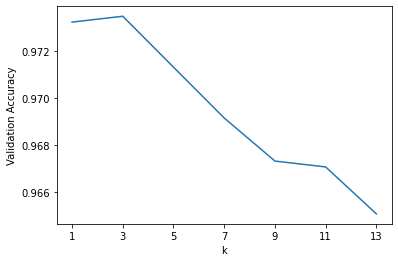

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_values, val_accs)
plt.xticks(k_values)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.show()

## 7) Test your classifier on test set

- Now that you have the best value for the ***n_neighbors*** parameter, train a model **with best parameters that you have found according to your validation results**. But now, train the model by combining the training and validation sets. Then report the accuracy on the test set. 

In [ ]:
# 1) initialize a k-NN classifier with n_neighbors parameter set to best_k
KNN = KNeighborsClassifier(n_neighbors= best_k)
# 2) combine the training and validation sets (you may want to look up numpy.concatenate function for this)
x_train = np.concatenate((X_development, X_validation))
y_train = np.concatenate((Y_development, Y_validation))
# 3) train the classifier using this set
KNN.fit(x_train,y_train)
# 4) get the predictions of the classifier on the test set
KNN_pred = KNN.predict(X_test)  
# 5) compute the accuracy of the predictions on the test set
KNN_accuracy = accuracy_score(y_true=y_test,y_pred=KNN_pred)
print('Test accuracy for k =', best_k, ' :', KNN_accuracy)


# Report your result

Test accuracy for k = 3  : 0.9705


##8) Report your results

**Notebook should be RUN:** As training and testing may take a long time, we may just look at your notebook results; so make sure **each cell is run**, so outputs are there.

**Report:** Write an **one page summary** of your approach to this problem **below**; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what kNN is or what MNIST is, assuming they are known to people in your research area). 

The aim of this report is to explain the steps taken to solve the first assignment of the Machine Learning course. The problem definiton is to implement a machine learning model which can predict (preferably with low error rate) a given sample from the MNIST dataset. For this purpose, we are going to train a k-NN classifier and optimize its performance by finding an optimal value for the nearest neighbors (I.e. k) parameter with the help of Scikit-learn library. First of all, MNIST dataset provides us with 60,000 training data and 10,000 test data. To find the optimal nearest neighbors parameter, we should split the training data into two portions: development data and validation data, with respective portions of 80% and 20%. It is noteworthy to mention that, we shuffle the training data beforehand splitting it to prevent our model to be biased towards any specific patterns or sequences in the data. Next, we train models  on the development data with different values for the nearest neighbors parameter from the list: [1, 3, 5, 7, 9, 11, 13]. Then we measure each of their performance on the validation data so to choose the one with the highest accuracy. Below is the table attached depicting the accuracy rate of models trained with different values for the nearest neighbors parameter from the list aforementioned.
Nearest Neighbors parameter (K)	Accuracy of the model on the validation dataset (percentage)
1 -> 0.97325
**3	-> 0.9735**
5	-> 0.9713
7	-> 0.9691
9	-> 0.9673
11 -> 0.967
13 -> 0.965
As highlighted on the table, the nearest neighbors parameter with the value of 3 showed the highest performance on the validation dataset with the accuracy of 97.35%. For this reason, we select the value 3 for the nearest neighbors parameter and train our new model on the full training dataset (i.e. development and validation data combined) which gives us the accuracy of 97.05% on the test data.
#Hagverdi Ibrahimli
#00030014
